Un modelo de clasificación multi-clase es un modelo de aprendizaje automático diseñado para asignar una observación o instancia a una de varias clases posibles. A diferencia de la clasificación binaria, donde solo hay dos clases (por ejemplo, "positivo" o "negativo"), en un problema de clasificación multi-clase, existen tres o más categorías mutuamente excluyentes.

Algoritmos comunes para problemas multi-clase:
Regresión logística multinomial: Extiende la regresión logística para manejar más de dos clases.
Árboles de decisión y Random Forests: Capaces de manejar problemas multi-clase directamente.
Máquinas de soporte vectorial (SVM): Utilizan estrategias como "uno contra uno" o "uno contra todos" para resolver problemas multi-clase.
Redes neuronales: Especialmente útiles en tareas más complejas como clasificación de imágenes o procesamiento de lenguaje natural.
K-Nearest Neighbors (KNN): Simple pero efectivo para problemas con clases múltiples.

In [2]:
import pandas as pd

# Load the uploaded dataset to examine its contents

file_path = 'C:/Users/h_ing/Documents/GitHub/ML_classification_model/teleCust1000t.csv'
data = pd.read_csv(file_path)

In [3]:
data.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


Initial Analysis of the Dataset

Dataset Overview:
The dataset appears to have demographic and categorical information for customers. Each row represents a customer, and the columns include demographic and behavioral data. The final column, custcat, represents the category or group the customer belongs to, which is the target variable for the classification task.

### Features and Potential Meanings

- **region**: Encodes the geographic region where the customer resides.  
  *(Categorical: likely mapped to specific locations.)*

- **tenure**: The duration (possibly in months or years) the customer has been associated with the service.  
  *(Numerical/Continuous)*

- **age**: The customer's age.  
  *(Numerical/Continuous)*

- **marital**: Marital status (binary: 0 = not married, 1 = married).  
  *(Binary)*

- **address**: Duration of residence at the current address. Likely measured in years.  
  *(Numerical/Continuous)*

- **income**: The customer's income, likely in thousands of dollars.  
  *(Numerical/Continuous)*

- **ed**: Education level, encoded numerically. This might represent levels such as high school, college, graduate, etc.  
  *(Ordinal)*

- **employ**: The number of years the customer has been employed.  
  *(Numerical/Continuous)*

- **retire**: Binary indicator of whether the customer is retired (0 = no, 1 = yes).  
  *(Binary)*

- **gender**: Binary representation of gender (0 = male, 1 = female).  
  *(Binary)*

- **reside**: The number of people living in the same residence.  
  *(Numerical/Discrete)*

- **custcat**: Customer category, the target variable, likely represents groups such as different customer types or behaviors.  
  *(Categorical)*


Decision for Analysis:
Given the need to predict custcat, the initial steps in Exploratory Data Analysis (EDA) will focus on understanding:

- Data quality: Checking for missing values, duplicates, or anomalies.
- Feature distributions: Understanding the spread and characteristics of numerical and categorical features.
- Feature correlations: Exploring relationships between features and the target variable.
- Outliers: Identifying any potential outliers that might affect the analysis or model.
- Class balance: Analyzing the distribution of custcat to determine if the classes are imbalanced.

In [4]:
# Checking for missing values, data types, and basic statistics.

data_info = data.info()
missing_values = data.isnull().sum()
summary_statistics = data.describe()

missing_values, summary_statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


(region     0
 tenure     0
 age        0
 marital    0
 address    0
 income     0
 ed         0
 employ     0
 retire     0
 gender     0
 reside     0
 custcat    0
 dtype: int64,
           region       tenure          age      marital      address  \
 count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
 mean      2.0220    35.526000    41.684000     0.495000    11.551000   
 std       0.8162    21.359812    12.558816     0.500225    10.086681   
 min       1.0000     1.000000    18.000000     0.000000     0.000000   
 25%       1.0000    17.000000    32.000000     0.000000     3.000000   
 50%       2.0000    34.000000    40.000000     0.000000     9.000000   
 75%       3.0000    54.000000    51.000000     1.000000    18.000000   
 max       3.0000    72.000000    77.000000     1.000000    55.000000   
 
             income           ed       employ       retire       gender  \
 count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
 mean   

### Data Analysis Summary

1. **Data Quality**:
    - **No missing values**: All columns have 1000 non-null entries.
    - **Data Types**: The dataset contains integers and floats, appropriate for the described features.
2. **Key Observations**:
    - **`region`**: Categorical, with values 1, 2, or 3.
    - **`tenure`**: Continuous, ranging from 1 to 72. Represents customer tenure.
    - **`age`**: Continuous, ranging from 18 to 77. Represents customer age.
    - **`marital`**: Binary, 0 or 1, representing marital status.
    - **`address`**: Continuous, ranging from 0 to 55. Likely years at the current address.
    - **`income`**: Highly variable, ranging from 9 to 1668, possibly skewed with outliers.
    - **`ed`**: Ordinal, values between 1 and 5. Likely education levels.
    - **`employ`**: Continuous, ranging from 0 to 47, representing employment duration.
    - **`retire`**: Binary, 0 or 1, indicating retirement status.
    - **`gender`**: Binary, 0 or 1, likely representing male and female.
    - **`reside`**: Discrete, ranging from 1 to 8, indicating the number of residents in the household.
    - **`custcat`**: Target variable with four distinct classes (1 to 4).
3. **Potential Issues**:
    - **Skewed income data**: The high standard deviation compared to the mean suggests potential outliers.
    - **Unbalanced classes**: The distribution of `custcat` needs to be evaluated to determine if some groups dominate others.
### Analyzing and Interpreting the Summary Statistics

Here’s a breakdown of what the results mean and how they can be interpreted for each column:

---

### **1. Region**
- **Values**: Min = 1, Max = 3, Mean = 2.022, Std = 0.8162
- **Interpretation**: 
  - Customers are distributed across three regions. 
  - The mean close to 2 suggests a relatively even distribution with perhaps a slight bias toward regions 2 and 3.
- **Usefulness**: Understanding regional differences helps businesses tailor regional marketing strategies or allocate resources effectively.

---

### **2. Tenure**
- **Values**: Min = 1, Max = 72, Mean = 35.526, Std = 21.36
- **Interpretation**:
  - The tenure distribution is wide, ranging from 1 (new customers) to 72 (likely long-term customers).
  - A mean of ~35 suggests that most customers are moderately experienced, with variability reflecting a mix of new and loyal customers.
- **Usefulness**: Segmentation by tenure can identify loyal customers for retention strategies or upselling, and new customers for onboarding campaigns.

---

### **3. Age**
- **Values**: Min = 18, Max = 77, Mean = 41.684, Std = 12.56
- **Interpretation**:
  - The age range spans from young adults (18) to seniors (77), with a mean of ~42.
  - The 25th percentile (32) and 75th percentile (51) suggest that most customers are middle-aged.
- **Usefulness**: Age-based analysis can inform demographic-specific offerings (e.g., retirement plans for older customers or lifestyle products for younger ones).

---

### **4. Marital**
- **Values**: Min = 0, Max = 1, Mean = 0.495
- **Interpretation**:
  - Binary variable (0 = not married, 1 = married).
  - A mean of 0.495 indicates nearly equal proportions of married and unmarried customers.
- **Usefulness**: Helps in demographic profiling and tailoring services for different life stages (e.g., family plans for married customers).

---

### **5. Address**
- **Values**: Min = 0, Max = 55, Mean = 11.551, Std = 10.086
- **Interpretation**:
  - Duration at the current address ranges widely, from newcomers (0) to long-term residents (55).
  - The median (9) and standard deviation (~10) indicate that most customers are moderately settled.
- **Usefulness**: Customers with long stays might prefer stability-focused products, while those with short stays may need portable or flexible services.

---

### **6. Income**
- **Values**: Min = 9, Max = 1668, Mean = 77.535, Std = 107.04
- **Interpretation**:
  - Income ranges dramatically, with a long tail of high-income customers. Most customers earn less than the mean (~77), as indicated by the high standard deviation.
  - Outliers likely skew the mean upward, so the median would provide a better center-point estimate.
- **Usefulness**: Income informs purchasing power and helps identify high-value customers for premium products.

---

### **7. Education (ed)**
- **Values**: Min = 1, Max = 5, Mean = 2.671, Std = 1.222
- **Interpretation**:
  - Education is ordinal, with values likely indicating levels (e.g., 1 = high school, 5 = graduate degree).
  - The mean and median (~3) suggest that most customers have moderate education levels.
- **Usefulness**: Education level can correlate with preferences for specific products or communication styles.

---

### **8. Employment (employ)**
- **Values**: Min = 0, Max = 47, Mean = 10.987, Std = 10.08
- **Interpretation**:
  - Employment duration ranges widely, with a median of 8 years. Long-tenured employees (47 years) may reflect a small subset nearing retirement.
- **Usefulness**: Employment duration correlates with stability and disposable income, aiding in segmentation.

---

### **9. Retirement (retire)**
- **Values**: Min = 0, Max = 1, Mean = 0.047
- **Interpretation**:
  - A mean of 0.047 indicates that only ~5% of customers are retired.
- **Usefulness**: Retired customers might prefer different services (e.g., fixed-income-friendly options).

---

### **10. Gender**
- **Values**: Min = 0, Max = 1, Mean = 0.517
- **Interpretation**:
  - Binary variable (0 = male, 1 = female).
  - The mean indicates a fairly even split between genders.
- **Usefulness**: Gender-specific patterns may emerge when combined with other variables.

---

### **11. Reside**
- **Values**: Min = 1, Max = 8, Mean = 2.331, Std = 1.436
- **Interpretation**:
  - The number of people per household is mostly small (median = 2), with outliers having larger households.
- **Usefulness**: Household size can inform family-oriented product or service design.

---

### Conclusions and Use Cases
- **Segmentation**: The data enables segmentation by age, income, region, and other attributes for personalized services.
- **Marketing**: Insights can help design targeted campaigns (e.g., premium offers for high-income customers or loyalty rewards for long-tenure customers).
- **Operational Strategy**: Demographic and behavioral insights aid in resource allocation, such as expanding services in regions with high-value customers.
- **Predictive Modeling**: Preprocessed features can now feed into machine learning models to predict customer categories (`custcat`), enhancing decision-making.

I will analyze the distributions of features, relationships with the target variable (custcat), and any patterns or correlations. This will include visualizations to clarify trends and distributions.

C:\Users\h_ing\AppData\Local\Temp\ipykernel_51012\1175973751.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (x=class_distribution.index,  y=class_distribution.values, palette='viridis')


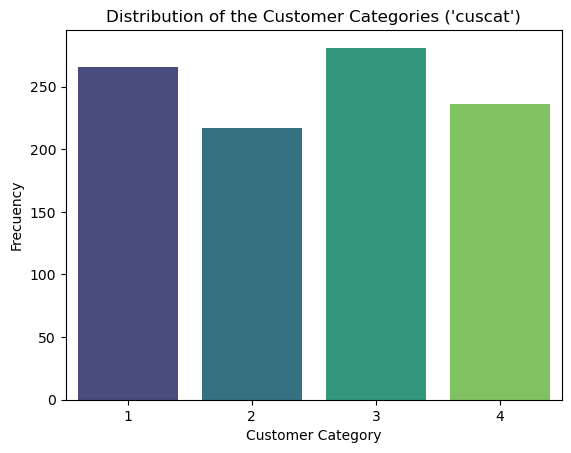

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the target variable 'custcat'ArithmeticError
class_distribution = data['custcat'].value_counts()

# Plot the distribution of the target variable
plt.figure(figure=(8, 5))
sns.barplot (x=class_distribution.index,  y=class_distribution.values, palette='viridis')
plt.title("Distribution of the Customer Categories ('cuscat')")
plt.xlabel("Customer Category")
plt.ylabel("Frecuency")
plt.show()


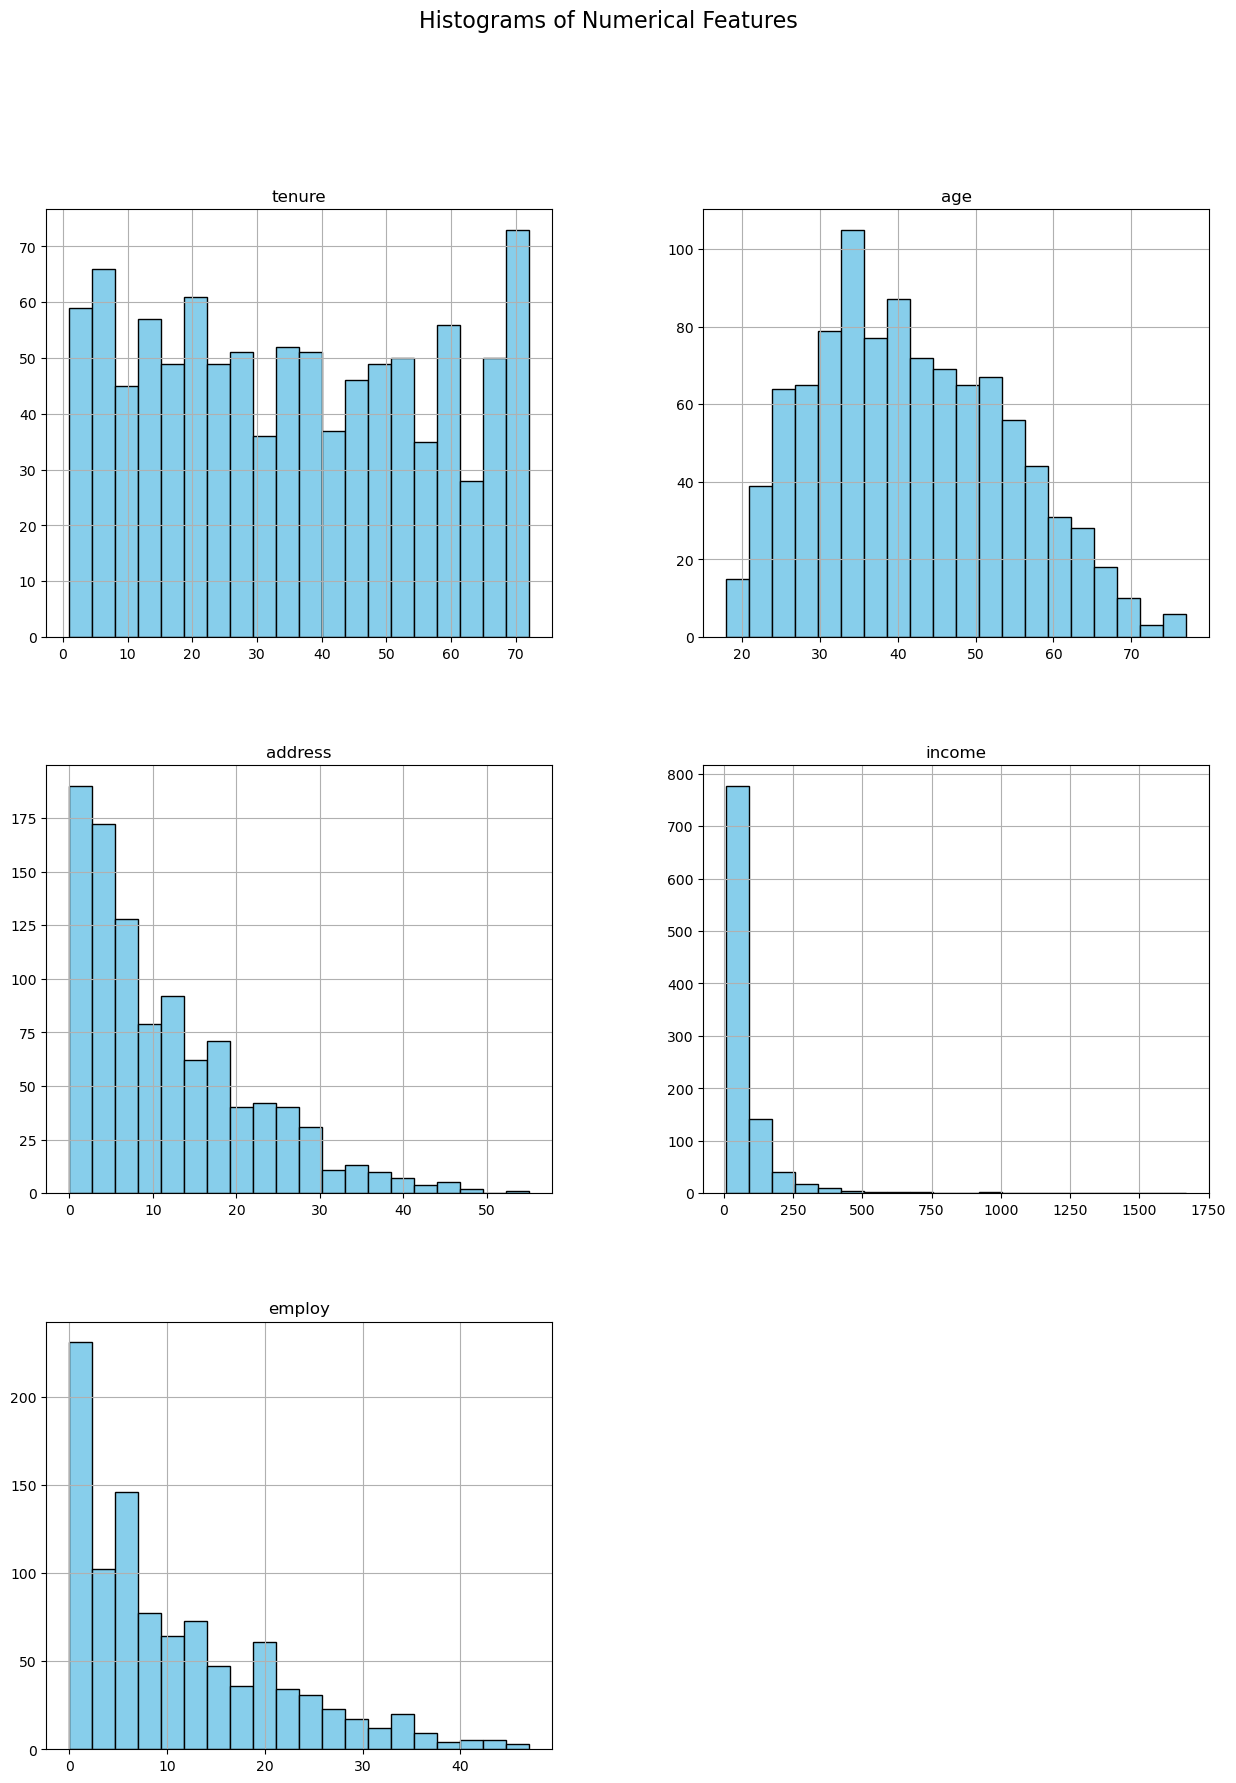

In [6]:
# Plot distributions of numerical variables to understand their spread
numerical_columns = ['tenure', 'age', 'address', 'income', 'employ']
data[numerical_columns].hist(bins=20, figsize=(15,20), color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show() 

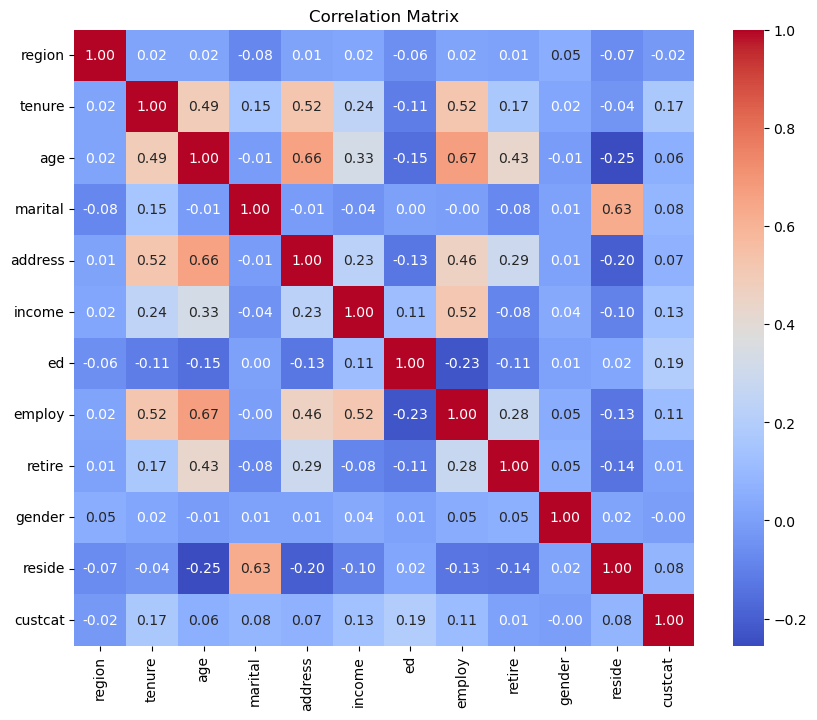

In [7]:
# Analyze correlations between numerical features and `custcat`
correlations = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Insights from Visualizations

## Target Variable (custcat) Distribution:
- The four categories are somewhat imbalanced.
- Categories 3 and 4 have higher frequencies compared to categories 1 and 2.
- This imbalance could affect model performance and may require strategies like oversampling, undersampling, or class weighting.

## Numerical Feature Distributions:
- **tenure**: Uniformly distributed with a peak in the middle range, indicating a mix of short- and long-term customers.
- **age**: Slightly skewed towards younger customers, with most between 30 and 50 years old.
- **address**: Shows a left skew, with most customers residing in their current address for fewer years.
- **income**: Highly skewed with a long tail. Outliers above 200 indicate high-income customers that may disproportionately affect analysis.
- **employ**: Left-skewed, with most customers having fewer years of employment.

## Correlation Matrix:
- **Strong correlations**:
  - `income` and `employ` have a noticeable positive correlation (~0.6), which makes sense as longer employment often leads to higher income.
- **Weak correlations with `custcat`**:
  - No single feature is highly correlated with `custcat`, suggesting that the target may depend on a combination of multiple features rather than one dominant factor.


## Next, I will analyze categorical features (region, marital, gender, etc.) and explore their relationship with custcat to identify patterns in customer categories.

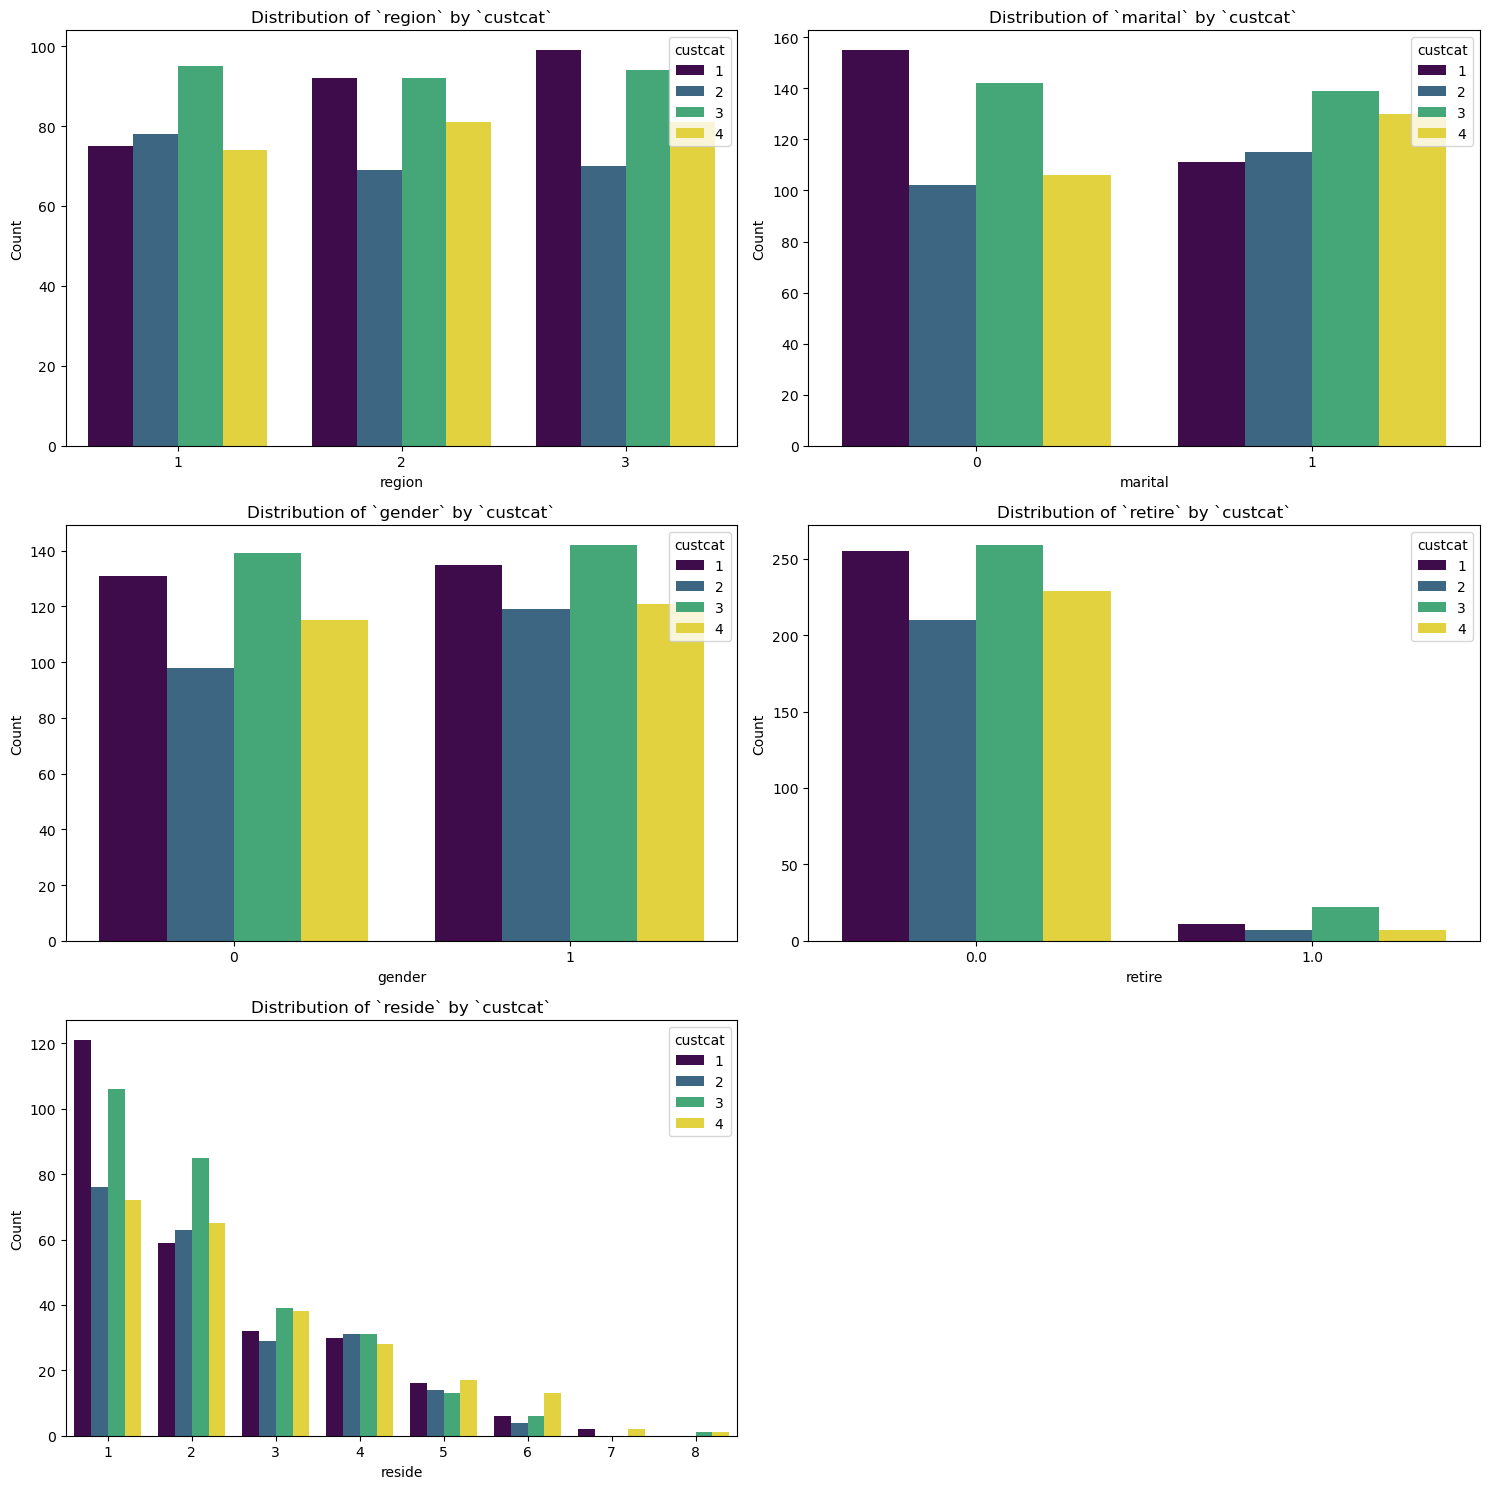

In [8]:
# Plot categorical features against `custcat` to explore relationships
categorical_columns = ['region', 'marital', 'gender', 'retire', 'reside']

plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=data, x=col, hue='custcat', palette="viridis")
    plt.title(f"Distribution of `{col}` by `custcat`")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title='custcat', loc='upper right')

plt.tight_layout()
plt.show()

# Insights from Categorical Features

## region:
- Customers are distributed across three regions, with some variation in the frequency of categories within each region.
- Region 2 appears to have a higher proportion of customers in categories 3 and 4.

## marital:
- Married customers (1) appear slightly more likely to belong to category 3.
- Non-married customers (0) are distributed relatively evenly across categories.

## gender:
- There is no strong gender preference across customer categories.
- Gender may not be a strong predictor for `custcat`.

## retire:
- Most customers are not retired.
- Retired customers (1) are concentrated in category 3.

## reside:
- The number of residents in a household (1 to 8) shows a decreasing trend in frequency.
- Most households have 1-3 residents.
- Categories seem fairly balanced across residence sizes.

# Preliminary Conclusions:
- The dataset has a mix of informative and less informative features for predicting `custcat`.
- Features such as `region`, `income`, and `employ` seem more likely to influence `custcat`.
- Features like `gender` and `reside` may contribute less predictive power.


## The next step involves preparing the data for modeling by addressing imbalances, handling outliers, and feature scaling/encoding. Let me know if you'd like to proceed with that! ​

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop(columns=['custcat'])
y = data['custcat']

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features to normalize their ranges
numerical_features = ['tenure', 'age', 'address', 'income', 'employ']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Ensure categorical variables are not altered by scaling
categorical_features = ['region', 'marital', 'gender', 'retire', 'reside']
processed_train = X_train.copy()
processed_test = X_test.copy()

# Verify preprocessing
processed_train.head(), processed_test.head()

(     region    tenure       age  marital   address    income  ed    employ  \
 564       3  1.447643  1.070317        0  0.857734  0.017698   2  1.287429   
 801       2 -0.615980 -1.091131        1 -1.157796 -0.376096   4 -1.082072   
 607       1 -0.006273 -0.610809        0 -0.452361 -0.000201   4 -0.094780   
 882       2 -0.193875  0.349834        0  1.160064  0.590490   4  0.201408   
 535       3 -0.193875 -0.610809        0 -0.250808  0.241445   4 -0.390968   
 
      retire  gender  reside  
 564     0.0       1       1  
 801     0.0       0       4  
 607     0.0       1       1  
 882     0.0       0       1  
 535     0.0       1       4  ,
      region    tenure       age  marital   address    income  ed    employ  \
 225       1  0.603434  0.429888        0 -0.250808 -0.053901   3  0.201408   
 429       1  1.588345  0.349834        1  0.656181 -0.107600   2  0.793783   
 842       2  0.697235 -1.331292        0 -0.553137 -0.528243   1 -0.588426   
 223       3  0.08752

### Analyzing and Interpreting Results

The preprocessing and analysis performed on the dataset aim to prepare it for a classification model. Let's break it down into key insights and conclusions:

---

### **1. Features and Their Role**
#### **Demographic and Behavioral Data**:
- **`region`**: Indicates geographical grouping, potentially showing trends based on location.
- **`income`**: Strongly correlated with employment, making it useful for predicting wealth-related customer categories.
- **`age` and `tenure`**: Reflect the customer’s lifecycle and loyalty.
- **`marital` and `gender`**: Offer basic demographic segmentation, though they seem less directly related to the target variable (`custcat`).
- **`retire`**: May provide insights about life stage (e.g., retired customers tend to cluster in certain categories).

**Conclusion**: Features like `income`, `employ`, `region`, and `tenure` seem to have more predictive power, while others like `gender` and `marital` are less influential.

---

### **2. Class Imbalance**
- **Observation**: Classes (`custcat`) are imbalanced. Categories 3 and 4 dominate, which could bias the model.
- **Action**: Addressing imbalance during modeling (e.g., using stratified sampling, weighted loss functions, or resampling techniques) is critical to ensure the model predicts all categories fairly.

**Conclusion**: Models might initially favor the dominant categories unless class imbalance is mitigated.

---

### **3. Data Distribution**
- **Numerical Features**:
  - Skewed distributions (e.g., `income`, `employ`) indicate potential outliers that could distort predictions. These were scaled to reduce their impact.
  - Normalized features like `tenure`, `age`, and `address` help models learn more effectively.
  
- **Categorical Features**:
  - Clear patterns exist between features like `region` and `custcat`. For instance, region 2 has a higher representation in categories 3 and 4.

**Conclusion**: Preprocessing, like scaling and encoding, ensures consistent feature behavior for the model and enables fair comparisons.

---

### **4. Correlations**
- Moderate positive correlation between `income` and `employ` indicates these variables are related but not redundant. Including both could add value.
- Weak correlation between individual features and `custcat` suggests no single factor predicts the target. A combination of features will likely be required for good performance.

**Conclusion**: Multi-dimensional relationships, rather than single-feature dominance, drive customer segmentation.

---

### Practical Utility
1. **Understanding Customer Segmentation**:
   - This analysis identifies key demographic and behavioral patterns in customer groups.
   - Businesses can target different customer segments more effectively by understanding their characteristics.

2. **Model Building**:
   - The preprocessing ensures the dataset is ready for training machine learning models. The standardized features reduce biases due to scale differences.
   - Insights into feature importance guide feature engineering and model tuning.

3. **Customer Insights**:
   - The segmentation allows personalized marketing strategies. For instance:
     - High-income, long-tenure customers could be offered premium services.
     - Younger customers with low tenure might need retention strategies.

4. **Decision-Making**:
   - Managers can use these insights to allocate resources efficiently, tailor customer outreach, or design products for specific demographics.

---

### Next Steps
- **Build a Classification Model**: Train and evaluate models like logistic regression, decision trees, or random forests.
- **Address Class Imbalance**: Implement strategies like oversampling minority classes or using weighted metrics.
- **Feature Engineering**: Create new features (e.g., income-to-age ratio, tenure per region) for improved predictions.
- **Deploy for Decision Support**: Use the model in customer relationship management (CRM) systems to predict customer categories dynamically.

This analysis not only prepares the data for modeling but also provides a foundation for actionable business insights. Let me know if you'd like help building the model or diving deeper into any aspect!

Class imbalance occurs when the distribution of target classes in a dataset is not uniform. In the case of the custcat variable, which has four categories, the classes are not equally represented. Let's break it down:

Observed Class Imbalance
Distribution of custcat:

The frequency of each category shows that some classes dominate while others are underrepresented.
Categories with higher representation (e.g., 3 and 4) might bias the model to predict these more often.
Underrepresented classes (e.g., 1 and 2) might have poorer prediction performance due to insufficient data.
Impact on Modeling:

Accuracy Misleading: A model biased toward the majority class may show high overall accuracy but fail to predict minority classes effectively.
Misclassification Costs: If certain classes are more critical for the business (e.g., high-value customers), the model may fail to identify them.

In [10]:
print(processed_train.describe())

           region        tenure           age     marital       address  \
count  800.000000  8.000000e+02  8.000000e+02  800.000000  8.000000e+02   
mean     2.030000  2.886580e-17 -2.031708e-16    0.487500  3.996803e-17   
std      0.812358  1.000626e+00  1.000626e+00    0.500156  1.000626e+00   
min      1.000000 -1.600891e+00 -1.891668e+00    0.000000 -1.157796e+00   
25%      1.000000 -8.973829e-01 -7.709167e-01    0.000000 -7.546901e-01   
50%      2.000000 -5.317347e-02 -1.304875e-01    0.000000 -2.508076e-01   
75%      3.000000  8.379365e-01  7.501028e-01    1.000000  5.554046e-01   
max      3.000000  1.729046e+00  2.831498e+00    1.000000  4.384912e+00   

             income          ed        employ     retire      gender  \
count  8.000000e+02  800.000000  8.000000e+02  800.00000  800.000000   
mean   6.661338e-17    2.673750 -7.105427e-17    0.04875    0.516250   
std    1.000626e+00    1.233577  1.000626e+00    0.21548    0.500048   
min   -6.177420e-01    1.000000 -1.0

In [11]:
print(processed_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 564 to 263
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   800 non-null    int64  
 1   tenure   800 non-null    float64
 2   age      800 non-null    float64
 3   marital  800 non-null    int64  
 4   address  800 non-null    float64
 5   income   800 non-null    float64
 6   ed       800 non-null    int64  
 7   employ   800 non-null    float64
 8   retire   800 non-null    float64
 9   gender   800 non-null    int64  
 10  reside   800 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 75.0 KB
None


In [12]:
print(processed_test.describe())


           region      tenure         age     marital     address      income  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     1.990000    0.091984    0.021614    0.525000    0.031367   -0.021815   
std      0.832687    1.005559    1.026537    0.500628    1.079928    0.766211   
min      1.000000   -1.600891   -1.811614    0.000000   -1.157796   -0.617742   
25%      1.000000   -0.768406   -0.850970    0.000000   -0.855467   -0.429795   
50%      2.000000    0.087528    0.029620    1.000000   -0.250808   -0.273172   
75%      3.000000    0.990363    0.830156    1.000000    0.756958    0.044548   
max      3.000000    1.729046    2.751444    1.000000    3.377147    4.591079   

               ed      employ      retire      gender      reside  
count  200.000000  200.000000  200.000000  200.000000  200.000000  
mean     2.660000    0.013328    0.040000    0.520000    2.540000  
std      1.179558    0.976597    0.196451    0.500854    1.575057 

In [13]:
print(processed_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 225 to 961
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   200 non-null    int64  
 1   tenure   200 non-null    float64
 2   age      200 non-null    float64
 3   marital  200 non-null    int64  
 4   address  200 non-null    float64
 5   income   200 non-null    float64
 6   ed       200 non-null    int64  
 7   employ   200 non-null    float64
 8   retire   200 non-null    float64
 9   gender   200 non-null    int64  
 10  reside   200 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 18.8 KB
None


In [14]:
# Check for imbalances in the target variable 'custcat'
target_distribution = data['custcat'].value_counts(normalize=True) * 100  # Percentage distribution

# Display the distribution
target_distribution

custcat
3    28.1
1    26.6
4    23.6
2    21.7
Name: proportion, dtype: float64

The target variable custcat has the following distribution across its categories:

- Category 3: 28.1%
- Category 1: 26.6%
- Category 4: 23.6%
- Category 2: 21.7%

This distribution suggests that the target variable is relatively balanced across the four categories, with no significant overrepresentation or underrepresentation of any single category. However, if a strict balance is required, you can consider resampling techniques like oversampling, undersampling, or SMOTE.

In [15]:
print(processed_train.isnull().sum())

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
dtype: int64


In [16]:
print(processed_test.isnull().sum())

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
dtype: int64


Train a Baseline Model
Start with a simple model to establish a baseline for performance. Examples include:

- Logistic Regression.
- Decision Trees.
- k-Nearest Neighbors (k-NN).

Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(processed_train, y_train)

# Predictions and evaluation
y_pred_log_reg = log_reg.predict(processed_test)
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))



Logistic Regression Performance:
Accuracy: 0.37
Confusion Matrix:
 [[21  5 17 10]
 [ 7  9 17 11]
 [20  3 25  8]
 [ 9 13  6 19]]
Classification Report:
               precision    recall  f1-score   support

           1       0.37      0.40      0.38        53
           2       0.30      0.20      0.24        44
           3       0.38      0.45      0.41        56
           4       0.40      0.40      0.40        47

    accuracy                           0.37       200
   macro avg       0.36      0.36      0.36       200
weighted avg       0.36      0.37      0.36       200



* Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(processed_train, y_train)

# Predictions and evaluation
y_pred_tree = decision_tree.predict(processed_test)
print("\nDecision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))



Decision Tree Performance:
Accuracy: 0.34
Confusion Matrix:
 [[18  7 16 12]
 [11 17  6 10]
 [10  9 22 15]
 [ 6 16 14 11]]
Classification Report:
               precision    recall  f1-score   support

           1       0.40      0.34      0.37        53
           2       0.35      0.39      0.37        44
           3       0.38      0.39      0.39        56
           4       0.23      0.23      0.23        47

    accuracy                           0.34       200
   macro avg       0.34      0.34      0.34       200
weighted avg       0.34      0.34      0.34       200



* k-Nearest Neighbors (k-NN)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# k-NN model (default k=5)
knn = KNeighborsClassifier()
knn.fit(processed_train, y_train)

# Predictions and evaluation
y_pred_knn = knn.predict(processed_test)
print("\nk-Nearest Neighbors Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))



k-Nearest Neighbors Performance:
Accuracy: 0.34
Confusion Matrix:
 [[25  6 16  6]
 [19 14  6  5]
 [23  9 20  4]
 [15 16  7  9]]
Classification Report:
               precision    recall  f1-score   support

           1       0.30      0.47      0.37        53
           2       0.31      0.32      0.31        44
           3       0.41      0.36      0.38        56
           4       0.38      0.19      0.25        47

    accuracy                           0.34       200
   macro avg       0.35      0.33      0.33       200
weighted avg       0.35      0.34      0.33       200



Explanation of Metrics

- Accuracy: The proportion of correctly classified samples.
- Confusion Matrix: Provides insights into which classes are being confused.
- Classification Report: Includes precision, recall, F1-score, and support for each class.

Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(processed_train, y_train)

# Predictions and evaluation
y_pred_rf = random_forest.predict(processed_test)
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest Performance:
Accuracy: 0.35
Confusion Matrix:
 [[22  9 17  5]
 [ 7 10 14 13]
 [14  8 23 11]
 [ 9 14  9 15]]
Classification Report:
               precision    recall  f1-score   support

           1       0.42      0.42      0.42        53
           2       0.24      0.23      0.24        44
           3       0.37      0.41      0.39        56
           4       0.34      0.32      0.33        47

    accuracy                           0.35       200
   macro avg       0.34      0.34      0.34       200
weighted avg       0.35      0.35      0.35       200



Train XGBoost

In [21]:
# Map the target variable to start from 0
y_train_mapped = y_train - 1
y_test_mapped = y_test - 1

Explanation
Why the Mapping?

XGBoost requires class labels to start at 0 for multiclass classification. Since your labels start at 1, this mapping ensures compatibility.
Mapping Back:

After prediction, we map the predicted values back to the original labels (+1) so the output remains consistent with your original dataset.

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# XGBoost model
xgboost = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgboost.fit(processed_train, y_train_mapped)

# Predictions and evaluation
y_pred_xgb = xgboost.predict(processed_test)

# Map predictions back to original class values
y_pred_xgb_original = y_pred_xgb + 1

# Evaluation
print("\nXGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_original))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_original))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb_original))



c:\miniconda3\envs\class_model_env\lib\site-packages\xgboost\core.py:158: UserWarning: [18:13:17] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance:
Accuracy: 0.37
Confusion Matrix:
 [[23  8 15  7]
 [ 5 12 15 12]
 [12  9 24 11]
 [ 8 16  8 15]]
Classification Report:
               precision    recall  f1-score   support

           1       0.48      0.43      0.46        53
           2       0.27      0.27      0.27        44
           3       0.39      0.43      0.41        56
           4       0.33      0.32      0.33        47

    accuracy                           0.37       200
   macro avg       0.37      0.36      0.36       200
weighted avg       0.37      0.37      0.37       200



In [23]:
from lightgbm import LGBMClassifier

# LightGBM model
lightgbm = LGBMClassifier(random_state=42)
lightgbm.fit(processed_train, y_train)

# Predictions and evaluation
y_pred_lgb = lightgbm.predict(processed_test)
print("\nLightGBM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print("Classification Report:\n", classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] Start training from score -1.323320
[LightGBM] [Info] Start training from score -1.531320
[LightGBM] [Info] Start training from score -1.268511
[LightGBM] [Info] Start training from score -1.442865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

* Steps to Implement a Neural Network

- Define the architecture of the neural network.
- Compile the model with an optimizer, loss function, and evaluation metrics.
- Train the model using the training dataset.
- Evaluate the model using the test dataset.

In [24]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Neural Network architecture
model = Sequential([
    Dense(64, activation='relu', input_dim=processed_train.shape[1]),  # First hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(4, activation='softmax')  # Output layer (4 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(processed_train, y_train_mapped, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate on the test set
y_pred_nn_probs = model.predict(processed_test)
y_pred_nn = y_pred_nn_probs.argmax(axis=1) + 1  # Map back to original class labels

# Evaluation metrics
print("\nNeural Network Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))

Epoch 1/50
20/20 [==============================] - 1s 25ms/step - loss: 1.4016 - accuracy: 0.2672 - val_loss: 1.3474 - val_accuracy: 0.3375
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 1.3334 - accuracy: 0.3562 - val_loss: 1.3234 - val_accuracy: 0.3375
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 1.3301 - accuracy: 0.3516 - val_loss: 1.3140 - val_accuracy: 0.3625
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 1.2951 - accuracy: 0.3859 - val_loss: 1.3159 - val_accuracy: 0.3625
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 1.2805 - accuracy: 0.3969 - val_loss: 1.2968 - val_accuracy: 0.3688
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 1.2726 - accuracy: 0.3938 - val_loss: 1.2932 - val_accuracy: 0.3500
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 1.2672 - accuracy: 0.3969 - val_loss: 1.2929 - val_accuracy: 0.3938
Epoch 8/50
20/20 [=

In [26]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Shift labels to start from 0
y_train_mapped = y_train - 1
y_test_mapped = y_test - 1

# Verify labels
print("Unique labels in y_train_mapped:", sorted(y_train_mapped.unique()))
print("Unique labels in y_test_mapped:", sorted(y_test_mapped.unique()))

# Define the objective function
def objective(trial):
    num_hidden_layers = trial.suggest_int("num_hidden_layers", 1, 3)
    hidden_units = trial.suggest_int("hidden_units", 32, 128)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)

    model = Sequential()
    model.add(Dense(hidden_units, activation='relu', input_dim=processed_train.shape[1]))
    model.add(Dropout(dropout_rate))

    for _ in range(num_hidden_layers - 1):
        model.add(Dense(hidden_units, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(4, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(processed_train, y_train_mapped, epochs=30, batch_size=32, verbose=0, validation_split=0.2)

    val_loss, val_accuracy = model.evaluate(processed_test, y_test_mapped, verbose=0)
    return val_accuracy

# Create a study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

# Best hyperparameters
print("Best hyperparameters:", study.best_params)
print("Best validation accuracy:", study.best_value)


c:\miniconda3\envs\class_model_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-12-09 18:13:23,981] A new study created in memory with name: no-name-89eb5b18-7575-440a-99ed-a9114f887f0e
C:\Users\h_ing\AppData\Local\Temp\ipykernel_51012\2862886900.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)


Unique labels in y_train_mapped: [0, 1, 2, 3]
Unique labels in y_test_mapped: [0, 1, 2, 3]


[I 2024-12-09 18:13:26,094] Trial 0 finished with value: 0.38999998569488525 and parameters: {'num_hidden_layers': 1, 'hidden_units': 47, 'dropout_rate': 0.31138469107548916, 'learning_rate': 0.0015580419211707476}. Best is trial 0 with value: 0.38999998569488525.
C:\Users\h_ing\AppData\Local\Temp\ipykernel_51012\2862886900.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
[I 2024-12-09 18:13:28,249] Trial 1 finished with value: 0.39500001072883606 and parameters: {'num_hidden_layers': 2, 'hidden_units': 37, 'dropout_rate': 0.40490124452551457, 'learning_rate': 0.0012410310085812213}. Best is trial 1 with value: 0.39500001072883606.
C:\Users\h_ing\AppData\Local\Temp\ipykernel_51012\2862886900.py:22: FutureWarning: suggest_loguniform has been deprecated in 

Best hyperparameters: {'num_hidden_layers': 2, 'hidden_units': 37, 'dropout_rate': 0.40490124452551457, 'learning_rate': 0.0012410310085812213}
Best validation accuracy: 0.39500001072883606
